In [ ]:
path_to_mallet = "../mallet-2.0.8/bin/mallet"

import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path

In [ ]:
directory = "../2020BLMCoverageLocal/"
files = glob.glob(f"{directory}/*.txt")

In [ ]:
#little_mallet_wrapper.process_string(text, numbers='remove')
training_data = []
for file in files:
    text = open(file, encoding='utf-8').read()
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove')
    training_data.append(processed_text)
original_texts = []
for file in files:
    text = open(file, encoding='utf-8').read()
    original_texts.append(text)

In [ ]:
file_titles = [Path(file).stem for file in files]

In [ ]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 430
Mean Number of Words per Document: 564.4
Vocabulary Size: 15970


In [ ]:
num_topics = 10
training_data = training_data
output_directory_path = '../2020BLMCoverageLocal/results/'
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

In [ ]:
little_mallet_wrapper.import_data(path_to_mallet,
                path_to_training_data,
                path_to_formatted_training_data,
                training_data)

Importing data...
Complete


In [ ]:
little_mallet_wrapper.train_topic_model(path_to_mallet,
                      path_to_formatted_training_data,
                      path_to_model,
                      path_to_topic_keys,
                      path_to_topic_distributions,
                      num_topics)

Training topic model...
Complete


In [ ]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

for topic_number, topic in enumerate(topics):
    print(f"✨Topic {topic_number}✨\n\n{topic}\n")

✨Topic 0✨

['kentucky', 'derby', 'louisville', 'said', 'churchill', 'downs', 'year', 'team', 'players', 'football', 'race', 'first', 'track', 'coach', 'pandemic', 'week', 'saturday', 'downtown', 'fans', 'covid']

✨Topic 1✨

['louisville', 'people', 'city', 'health', 'need', 'violence', 'new', 'support', 'leaders', 'community', 'care', 'year', 'help', 'work', 'bail', 'public', 'pandemic', 'million', 'money', 'including']

✨Topic 2✨

['police', 'said', 'mcatee', 'night', 'shooting', 'shot', 'officers', 'guard', 'two', 'david', 'video', 'national', 'street', 'louisville', 'monday', 'lmpd', 'fired', 'man', 'killed', 'gerth']

✨Topic 3✨

['kentucky', 'state', 'booker', 'mcconnell', 'senate', 'vote', 'mcgrath', 'campaign', 'trump', 'said', 'also', 'republican', 'democratic', 'scott', 'voting', 'political', 'bill', 'primary', 'president', 'beshear']

✨Topic 4✨

['taylor', 'cameron', 'officers', 'police', 'breonna', 'attorney', 'said', 'apartment', 'investigation', 'case', 'fired', 'death', 'c

In [ ]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)
topic_distributions[1]

[0.011811023622047244,
 0.003937007874015748,
 0.011811023622047244,
 0.14566929133858267,
 0.35039370078740156,
 0.0984251968503937,
 0.011811023622047244,
 0.003937007874015748,
 0.1220472440944882,
 0.24015748031496062]

In [ ]:
file_to_check = "Article1"

file_number = file_titles.index(file_to_check)

print(f"Topic Distributions for {file_titles[file_number]}\n")
for topic_number, (topic, topic_distribution) in enumerate(zip(topics, topic_distributions[file_number])):
    print(f"✨Topic {topic_number} {topic[:6]} ✨\nProbability: {round(topic_distribution, 3)}\n")


Topic Distributions for Article1

✨Topic 0 ['kentucky', 'derby', 'louisville', 'said', 'churchill', 'downs'] ✨
Probability: 0.012

✨Topic 1 ['louisville', 'people', 'city', 'health', 'need', 'violence'] ✨
Probability: 0.04

✨Topic 2 ['police', 'said', 'mcatee', 'night', 'shooting', 'shot'] ✨
Probability: 0.012

✨Topic 3 ['kentucky', 'state', 'booker', 'mcconnell', 'senate', 'vote'] ✨
Probability: 0.027

✨Topic 4 ['taylor', 'cameron', 'officers', 'police', 'breonna', 'attorney'] ✨
Probability: 0.027

✨Topic 5 ['police', 'said', 'fischer', 'officers', 'city', 'metro'] ✨
Probability: 0.014

✨Topic 6 ['protesters', 'louisville', 'said', 'police', 'protests', 'taylor'] ✨
Probability: 0.014

✨Topic 7 ['statue', 'davis', 'history', 'kentucky', 'state', 'beshear'] ✨
Probability: 0.517

✨Topic 8 ['said', 'one', 'people', 'like', 'would', 'going'] ✨
Probability: 0.271

✨Topic 9 ['black', 'white', 'people', 'justice', 'community', 'lives'] ✨
Probability: 0.064



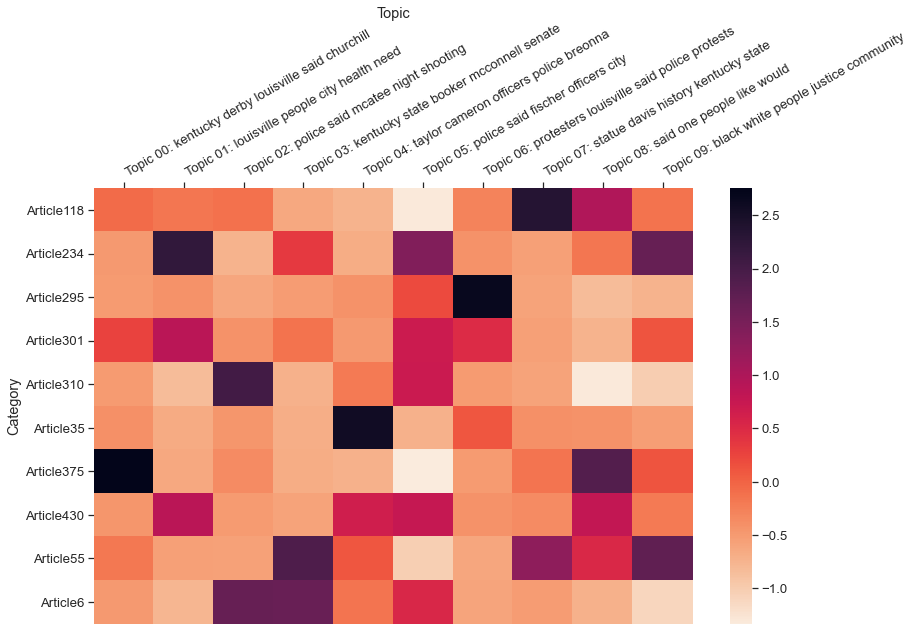

In [ ]:
#heatmap - PDF available in output folder
import random
target_labels = random.sample(file_titles, 10)
little_mallet_wrapper.plot_categories_by_topics_heatmap(file_titles,
                                      topic_distributions,
                                      topics, 
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels=target_labels,
                                      dim= (13, 9)
                                     )

In [ ]:
#display topic words in context of original text
#who knows about this error message man
from IPython.display import Markdown, display
import re

def display_bolded_topic_words_in_context(topic_number=3, number_of_documents=3, custom_words=None):

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        
        print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")
        
        probability = f"✨✨✨\n\n**{probability}**"
        file_title = f"**{training_data_file_titles[document]}**"
        original_text = training_data_original_text[document]
        topic_words = topics[topic_number]
        topic_words = custom_words if custom_words != None else topic_words

        for word in topic_words:
            if word in original_text:
                original_text = re.sub(f"\\b{word}\\b", f"**{word}**", original_text)

        display(Markdown(probability)), display(Markdown(file_title)), display(Markdown(original_text))
    return